# TDT05 - Self Supervised Learning - miniproject

1. Use the MNIST dataset in a little-supervised setting. We will train an autoencoder to find a more efficient representation of the images in a lower latent space.
2. We will then train a normal digit classifier in a supervised setting with 1% of the labels from MNIST.
3. Finally use the pretrained encoder from the autoencoder to tune a newly added single layer for digit classification. We will not adjust the encoder weights further, but only the last layer. The training at this stage will also use 1% labels in a supervised setting.
4. Compare the accuracy difference from the pure-supervised, to the tuned classifier.

In [1]:
from typing import *
import matplotlib.pyplot as plt
from autoencoder import AutoEncoder
from classifier import Classifier

In [2]:
# Set to True to load existing models instead.
load_existing = False
device = "cuda:0"

# Autoencoder

In the following cell we train an auto-encoder to learn better representations of the mnist data. We played around with the latent_size setting to find an optimal value, and concluded that it wasn't worth going below 10 as the encoder struggled to efficiently encode the images at the lower latent space.

loss=0.02080251: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:53<00:00, 37.72it/s]


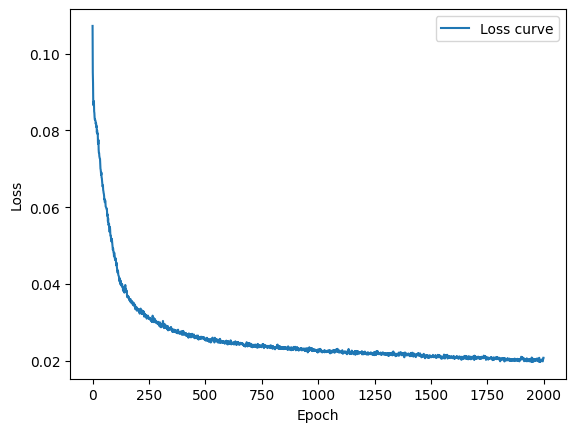

In [3]:
if load_existing:
    auto_encoder = AutoEncoder.load("model.autoencoder")
else:
    auto_encoder = AutoEncoder(
        train_size=0.8,
        device=device,
        latent_size=10,
        lr=0.003
    )
    auto_encoder.train(2000, batch=0.05, plot_stats=True)
    auto_encoder.save("model")

Below is comparisons between ground-truths (images from mnist) and the decoder outputs. We frewuently encountered black dots manifesting in the decodings, and we believe this affected the following tuned model's performance.

We assumed numerical instabillity, casting errors, or overflow might be the reason behind the black dots, but we haven't discovered the source of this problem yet.

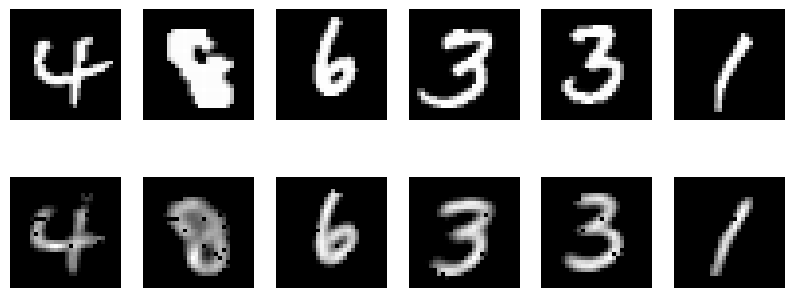

In [4]:
auto_encoder.plot_predictions()

# Pure classifier

Here we train a normal classifier. Note that the hidden layers share the same architecture as the encoder in the auto-encoder. Our models only receives 1% labeled data for training here, and yields adequate results given the small data. This is probably due to simplicity of the mnist dataset.

loss=0.17095563, accuracy=0.8145: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 700/700 [01:17<00:00,  9.08it/s]


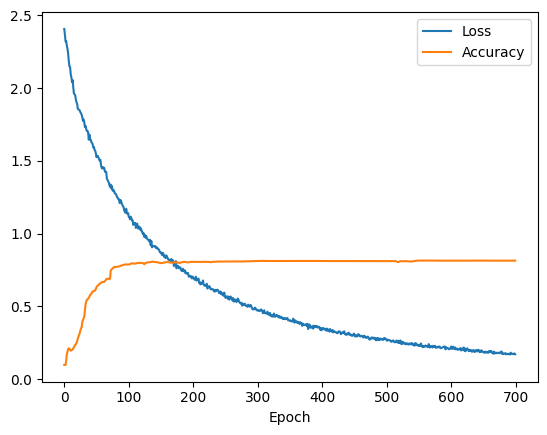

In [5]:
if load_existing:
    classifier = Classifier.load("model.classifier")
else:
    classifier = Classifier(
        train_size=0.01,
        device=device,
        latent_size=10,
        lr=0.002
    )
    classifier.train(
        epochs=700, 
        batch=0.4, 
        plot_stats=True, 
        optimize_encoder=True
        )
    classifier.save("model")

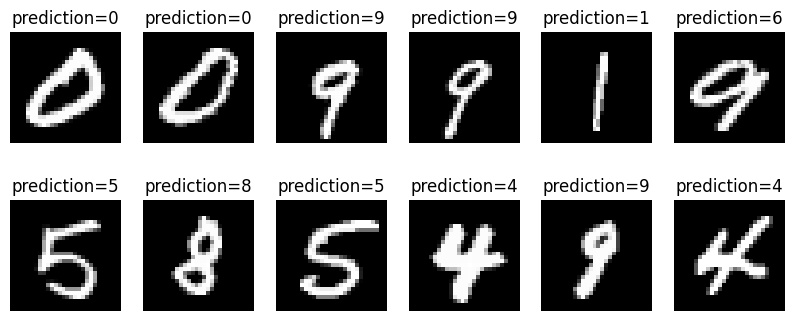

In [6]:
classifier.plot_predictions()

# Tuned classifier from encoder

Here we create a classifier from the auto-encoder first created. We do not tune the weights of the pre-trained encoder, but only the newly added layer at the output. 

We had to increase the learning rate here to yield any results. This is contrary to what we first believed would be optimal due to the fact that the train-data portion is very small. We think this is due to the small parameter-space that's actually being modified.

loss=0.31082109, accuracy=0.8715: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 700/700 [00:19<00:00, 36.50it/s]


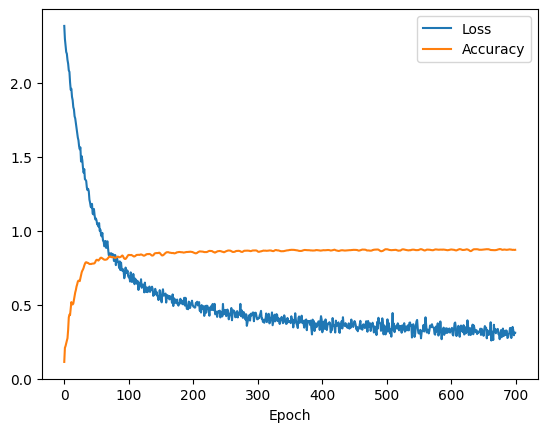

In [7]:
if load_existing:
    tuned_classifier = Classifier.load("pretrained.classifier")
else:
    tuned_classifier = auto_encoder.to_classifier(train_size=0.01, lr=0.05)
    tuned_classifier.train(
        epochs=700,
        batch=.5,
        plot_stats=True,
        optimize_encoder=False
    )
    tuned_classifier.save("pretrained")

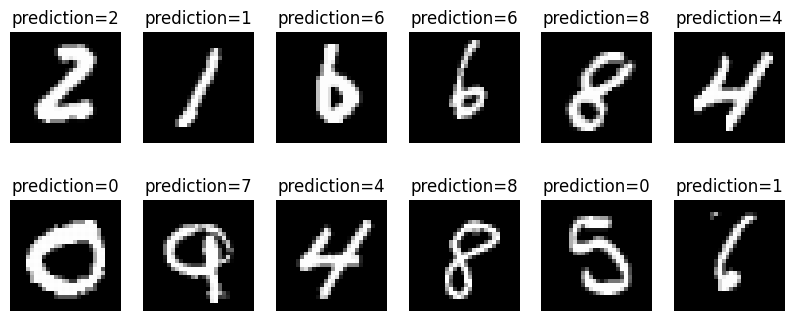

In [8]:
tuned_classifier.plot_predictions()

# Conclusion

We observed some performance boosts with the tuning approach, in contrast to conventional supervised learning. We gained 1-5% in accuracy, but we are not certain wether this is attributed the approach being better, or because the hyperparameter config were better. We assume the post-tuning method for the classififer would be more rewarding if the dataset were more complex, such as including more translational variance, rotation, and different colours.